# **Laboratorio N°5: Número de Condición**


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [3]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

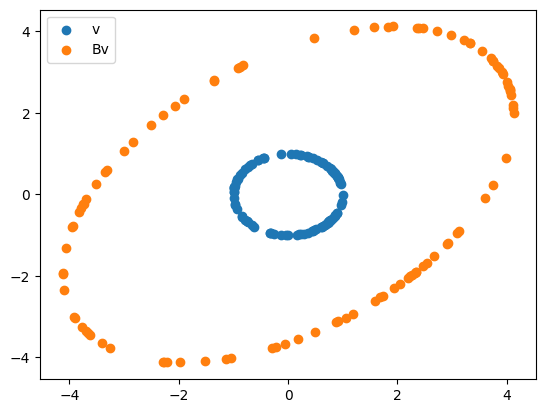

In [12]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5 
norm = np.linalg.norm(V,axis=0) # axis=0 lo hace por columna, 

V =  V/ norm
BV = B @ V # producto matricial
plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [67]:
def vector_condicion(M, N):
  
  cond = np.zeros(N)
  for n in range(0,N):
    cond[n] = np.linalg.cond(M(n+1))  # Cond₂(M) = σ_max / σ_min
  return(cond)
  

**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


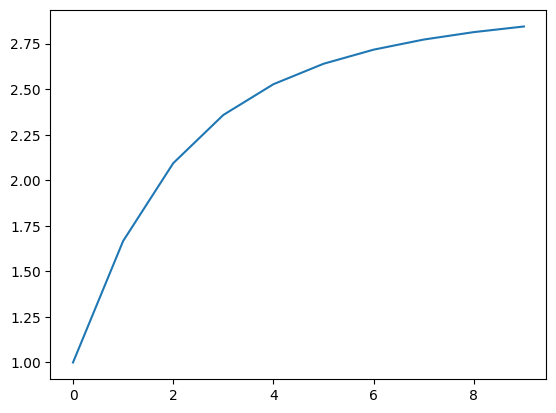

In [68]:
N = 10
x = np.arange(0, N)  # Tamaños de matriz: [1, 2, ..., 10]
y = vector_condicion(matriz_B, N)  # Númerose condición para B_1 a B_10


plt.plot(x, y)
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

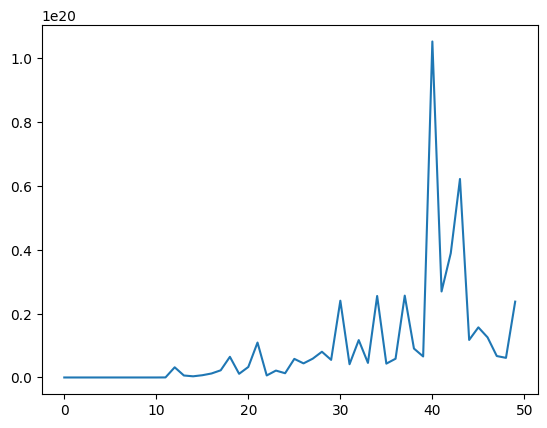

In [75]:
def matriz_H(n):
    
    i,j = np.indices((n,n))
    
    M = 1 / (i+j+1) 
    return(M)

N = 50
x = np.arange(0, N)  # Tamaños de matriz: [1, 2, ..., 10]
y = vector_condicion(matriz_H, N)  # Númerose condición para B_1 a B_10


plt.plot(x, y)
plt.show()

## Ejercicio 3 (Ej 20 - Práctica 2)


Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [4]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])
A_i = np.linalg.inv(A)
print(A_i)

[[ 0.33333333  0.          0.        ]
 [ 0.          1.25       -0.75      ]
 [ 0.         -0.75        1.25      ]]


(a) Calcular $Cond_\infty(A)$.


In [5]:
cond = np.linalg.cond(A, p=np.inf)
print(cond)

6.0


(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
‖𝑏−𝑏̃‖ / ‖𝑏‖ < 10e-4/cond_inf(A) segun los calculos

𝑏̃ = b + e -> 𝑏̃ - b = e -> ‖𝑏−𝑏̃‖ = ‖e‖ -> ‖𝑏−𝑏̃‖ / ‖𝑏‖ = ‖e‖ / ‖𝑏‖ 

‖e‖ / ‖𝑏‖ < 10e-4/cond_inf(A) -> ‖e‖ < (10e-4/cond_inf(A)) * ‖𝑏‖

luego genero algun vector aleatorio en el rango de [-1,1] y lo multiplico por el error. Eso luego seria b_p = e + b

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [10]:
b = np.array([3,2,2])
x = np.array([1,1,1])

error_relativo = 10e-4 / cond #lo calculado en el item anterior

e_cond = error_relativo * (np.linalg.norm(b,np.inf))
#ahora vamos a perturbar el valor de b
random = np.random.uniform(low=-1,high=1,size=3)
e = random * e_cond

b_p = b + e

x_p = np.linalg.solve(A,b_p)

print((np.linalg.norm(x-x_p,np.inf))/(np.linalg.norm(x,np.inf))<error_relativo)

True
